# Utilization of libraries

In [ ]:
#!pip install hvplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.2 MB 7.1 MB/s 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Loading of Dataset

In [ ]:
#data=pd.read_csv("./BCS.csv")

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving BCS.csv to BCS.csv


In [ ]:
import io
 
data = pd.read_csv(io.BytesIO(uploaded['BCS.csv']))
print(data)

            Date      Open      High       Low     Close  Adj Close   Volume
0     1986-09-09  0.000000  5.081468  5.040323  5.040323   1.336654   198685
1     1986-09-10  5.060895  5.102041  5.060895  5.102041   1.353020     3646
2     1986-09-11  5.081468  5.081468  5.009463  5.009463   1.328471   159191
3     1986-09-12  4.896313  4.896313  4.855168  4.896313   1.298464    12760
4     1986-09-15  4.937459  5.009463  4.937459  4.937459   1.309375    31595
...          ...       ...       ...       ...       ...        ...      ...
9067  2022-08-30  7.900000  7.920000  7.750000  7.800000   7.800000  4736200
9068  2022-08-31  7.800000  7.860000  7.780000  7.790000   7.790000  4853600
9069  2022-09-01  7.630000  7.650000  7.510000  7.610000   7.610000  5005500
9070  2022-09-02  7.820000  7.990000  7.700000  7.720000   7.720000  9477400
9071  2022-09-06  7.960000  7.980000  7.790000  7.830000   7.830000  7083100

[9072 rows x 7 columns]


# Overviewing of data

In [ ]:
data

Date      Open      High       Low     Close  Adj Close   Volume
0     1986-09-09  0.000000  5.081468  5.040323  5.040323   1.336654   198685
1     1986-09-10  5.060895  5.102041  5.060895  5.102041   1.353020     3646
2     1986-09-11  5.081468  5.081468  5.009463  5.009463   1.328471   159191
3     1986-09-12  4.896313  4.896313  4.855168  4.896313   1.298464    12760
4     1986-09-15  4.937459  5.009463  4.937459  4.937459   1.309375    31595
...          ...       ...       ...       ...       ...        ...      ...
9067  2022-08-30  7.900000  7.920000  7.750000  7.800000   7.800000  4736200
9068  2022-08-31  7.800000  7.860000  7.780000  7.790000   7.790000  4853600
9069  2022-09-01  7.630000  7.650000  7.510000  7.610000   7.610000  5005500
9070  2022-09-02  7.820000  7.990000  7.700000  7.720000   7.720000  9477400
9071  2022-09-06  7.960000  7.980000  7.790000  7.830000   7.830000  7083100

[9072 rows x 7 columns]

# Exploratory Data Analysis

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9072 entries, 0 to 9071
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       9072 non-null   object 
 1   Open       9072 non-null   float64
 2   High       9072 non-null   float64
 3   Low        9072 non-null   float64
 4   Close      9072 non-null   float64
 5   Adj Close  9072 non-null   float64
 6   Volume     9072 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 496.2+ KB


In [ ]:
data.shape

(9072, 7)

In [ ]:
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [ ]:
data.describe()

Open         High          Low        Close    Adj Close  \
count  9072.000000  9072.000000  9072.000000  9072.000000  9072.000000   
mean     16.952632    17.116268    16.798849    16.969454    10.186612   
std      11.807148    11.910410    11.709088    11.819426     7.326757   
min       0.000000     2.967742     2.534562     2.829493     1.156615   
25%       7.661290     7.741935     7.603687     7.667822     4.069468   
50%      12.741936    12.875576    12.534562    12.764977     9.457120   
75%      24.383928    24.654379    24.087557    24.423964    13.269218   
max      57.741936    57.769585    57.188938    57.566818    35.969124   

             Volume  
count  9.072000e+03  
mean   1.690869e+06  
std    3.545802e+06  
min    0.000000e+00  
25%    1.866200e+04  
50%    2.088625e+05  
75%    2.600050e+06  
max    1.496358e+08

In [ ]:
data.size

63504

### Checking for Null Values

In [ ]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

# Visualizing Procedure

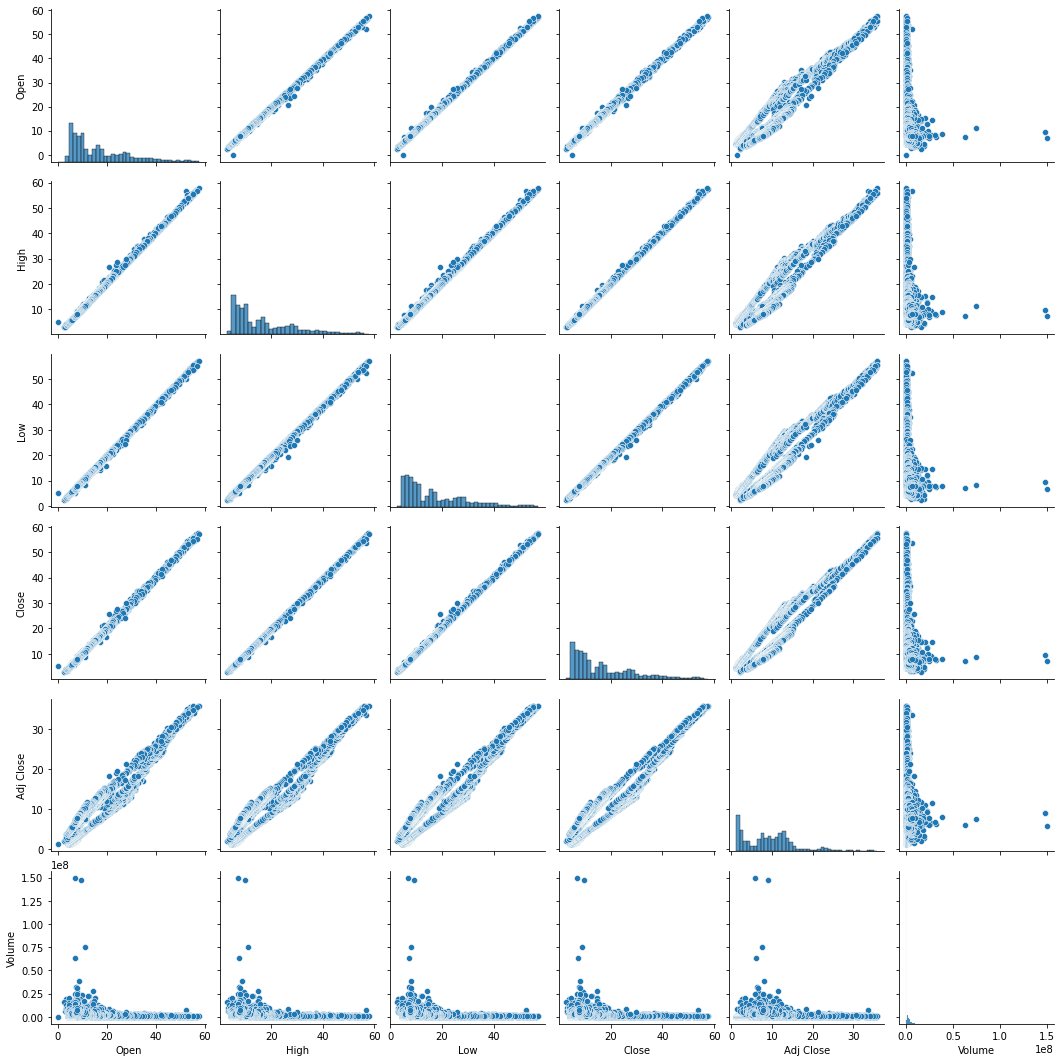

In [ ]:
sns.pairplot(data)

In [ ]:
data.hvplot.hist(by='Volume', subplots=False, width=1000)

:NdOverlay   [Element]
   :Histogram   [Adj Close]   (Adj Close_count)

In [ ]:
data.hvplot.scatter(x='Open', y='Volume')

:Scatter   [Open]   (Volume)

# Correletion analysis

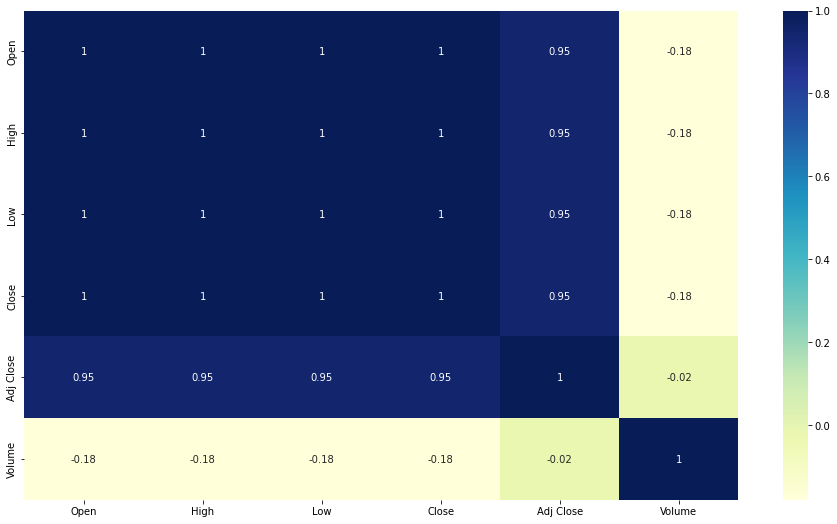

In [ ]:
plt.figure(figsize=(16,9))
sns.heatmap(data.corr(), annot = True, cmap="YlGnBu")

# Initialtion of Machine Learning Method

In [ ]:
X = data.drop(["Date", "Volume"],axis=1)
y = data[['Volume']]

## Splitting of Variable

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

NameError: ignored

# Model Development

In [ ]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

### Model Pipelining and Standard Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
pipeline = Pipeline([('std_scalar', StandardScaler())])
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

# Implementing Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

LinearRegression(normalize=True)

In [ ]:
print(lin_reg.intercept_)

[1695786.12456692]


### Predicting data

In [ ]:
pred = lin_reg.predict(X_test)

### Obtaining accuracy of the model

In [ ]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])

Test set evaluation:
_____________________________________
MAE: 1239666.21890798
MSE: 11850237471529.164
RMSE: 3442417.3877566275
R2 Square 0.22091298826611505
__________________________________
Train set evaluation:
_____________________________________
MAE: 1225614.9119899855
MSE: 8086681126460.233
RMSE: 2843709.043917861
R2 Square 0.2931206220565832
__________________________________


### Implementing Robust Regression

In [ ]:
from sklearn.linear_model import RANSACRegressor
model = RANSACRegressor(base_estimator=LinearRegression(), max_trials=100)
model.fit(X_train, y_train)

RANSACRegressor(base_estimator=LinearRegression())

### Prediction of data

In [ ]:
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

### Obtaining accuracy of the model

In [ ]:
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Robust Regression", *evaluate(y_test, test_pred) , cross_val(RANSACRegressor())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])

Test set evaluation:
_____________________________________
MAE: 1542831.1147273765
MSE: 17183593782096.336
RMSE: 4145309.853569011
R2 Square -0.12972543906454437
__________________________________
Train set evaluation:
_____________________________________
MAE: 1556916.4157748567
MSE: 13459466372590.56
RMSE: 3668714.5395343257
R2 Square -0.1765295388952468
__________________________________


In [ ]:
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model           MAE           MSE          RMSE  R2 Square  \
0  Linear Regression  1.239666e+06  1.185024e+13  3.442417e+06   0.220913   
1  Robust Regression  1.542831e+06  1.718359e+13  4.145310e+06  -0.129725   

   Cross Validation  
0       -320.936045  
1        -22.643744

### Implementing Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
model.fit(X_train, y_train)

Ridge(alpha=100, random_state=42, solver='cholesky', tol=0.0001)

### Prediction of data

In [ ]:
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

### Obtaining accuracy of the model

In [ ]:
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_3 = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, test_pred) , cross_val(Ridge())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])

Test set evaluation:
_____________________________________
MAE: 1244068.5708231707
MSE: 12212681210980.584
RMSE: 3494664.6779026715
R2 Square 0.19708433415101534
__________________________________
Train set evaluation:
_____________________________________
MAE: 1225222.2007173419
MSE: 8455042815518.869
RMSE: 2907755.6320156734
R2 Square 0.26092109822869936
__________________________________


In [ ]:
results_df = results_df.append(results_df_3, ignore_index=True)
results_df

Model           MAE           MSE          RMSE  R2 Square  \
0  Linear Regression  1.239666e+06  1.185024e+13  3.442417e+06   0.220913   
1  Robust Regression  1.542831e+06  1.718359e+13  4.145310e+06  -0.129725   
2   Ridge Regression  1.244069e+06  1.221268e+13  3.494665e+06   0.197084   

   Cross Validation  
0       -320.936045  
1        -22.643744  
2       -320.628060

# Implementing LASSO Regression

In [ ]:
from sklearn.linear_model import Lasso
model = Lasso(alpha=0.1, 
              precompute=True,
              positive=True, 
              selection='random',
              random_state=42)
model.fit(X_train, y_train)

Lasso(alpha=0.1, positive=True, precompute=True, random_state=42,
      selection='random')

### Prediction of data

In [ ]:
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

### Obtaining accuracy of the model

In [ ]:
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)
results_df_4 = pd.DataFrame(data=[["Lasso Regression", *evaluate(y_test, test_pred) , cross_val(Lasso())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])

Test set evaluation:
_____________________________________
MAE: 1908577.96487784
MSE: 15210684460643.89
RMSE: 3900087.7503774054
R2 Square -1.7656299414081644e-05
__________________________________
Train set evaluation:
_____________________________________
MAE: 1901044.315545167
MSE: 11439973181828.404
RMSE: 3382302.9405759037
R2 Square 0.0
__________________________________


In [ ]:
results_df = results_df.append(results_df_4, ignore_index=True)
results_df

Model           MAE           MSE          RMSE  R2 Square  \
0  Linear Regression  1.239666e+06  1.185024e+13  3.442417e+06   0.220913   
1  Robust Regression  1.542831e+06  1.718359e+13  4.145310e+06  -0.129725   
2   Ridge Regression  1.244069e+06  1.221268e+13  3.494665e+06   0.197084   
3   Lasso Regression  1.908578e+06  1.521068e+13  3.900088e+06  -0.000018   

   Cross Validation  
0       -320.936045  
1        -22.643744  
2       -320.628060  
3       -290.116546

# Implementing Elastic Net

In [ ]:
from sklearn.linear_model import ElasticNet
model = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=42)
model.fit(X_train, y_train)

ElasticNet(alpha=0.1, l1_ratio=0.9, random_state=42, selection='random')

### Prediction of data

In [ ]:
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

### Obtaining accuracy of the model

In [ ]:
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_5 = pd.DataFrame(data=[["Elastic Net Regression", *evaluate(y_test, test_pred) , cross_val(ElasticNet())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])

Test set evaluation:
_____________________________________
MAE: 1250254.1962660165
MSE: 12168573192474.145
RMSE: 3488348.2040177905
R2 Square 0.19998419032809578
__________________________________
Train set evaluation:
_____________________________________
MAE: 1230714.8030605535
MSE: 8412097745739.328
RMSE: 2900361.6577487933
R2 Square 0.2646750466949209
__________________________________


In [ ]:
results_df = results_df.append(results_df_5, ignore_index=True)
results_df

Model           MAE           MSE          RMSE  \
0       Linear Regression  1.239666e+06  1.185024e+13  3.442417e+06   
1       Robust Regression  1.542831e+06  1.718359e+13  4.145310e+06   
2        Ridge Regression  1.244069e+06  1.221268e+13  3.494665e+06   
3        Lasso Regression  1.908578e+06  1.521068e+13  3.900088e+06   
4  Elastic Net Regression  1.250254e+06  1.216857e+13  3.488348e+06   

   R2 Square  Cross Validation  
0   0.220913       -320.936045  
1  -0.129725        -22.643744  
2   0.197084       -320.628060  
3  -0.000018       -290.116546  
4   0.199984       -206.631850

# Implementing Stochastic Gradient Descent

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(n_iter_no_change=250, penalty=None, eta0=0.0001, max_iter=100000)
sgd_reg.fit(X_train, y_train)

SGDRegressor(eta0=0.0001, max_iter=100000, n_iter_no_change=250, penalty=None)

### Prediction of data

In [ ]:
test_pred = sgd_reg.predict(X_test)
train_pred = sgd_reg.predict(X_train)

### Obtaining accuracy of the model

In [ ]:
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_6 = pd.DataFrame(data=[["Stochastic Gradient Descent", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])

Test set evaluation:
_____________________________________
MAE: 1261766.2865522576
MSE: 12074390569131.113
RMSE: 3474822.379508212
R2 Square 0.2061761724511436
__________________________________
Train set evaluation:
_____________________________________
MAE: 1241834.091252044
MSE: 8317810356102.961
RMSE: 2884061.4341762834
R2 Square 0.27291697070451004
__________________________________


In [ ]:
results_df = results_df.append(results_df_6, ignore_index=True)

In [ ]:
results_df

Model           MAE           MSE          RMSE  \
0            Linear Regression  1.239666e+06  1.185024e+13  3.442417e+06   
1            Robust Regression  1.542831e+06  1.718359e+13  4.145310e+06   
2             Ridge Regression  1.244069e+06  1.221268e+13  3.494665e+06   
3             Lasso Regression  1.908578e+06  1.521068e+13  3.900088e+06   
4       Elastic Net Regression  1.250254e+06  1.216857e+13  3.488348e+06   
5  Stochastic Gradient Descent  1.261766e+06  1.207439e+13  3.474822e+06   

   R2 Square  Cross Validation  
0   0.220913       -320.936045  
1  -0.129725        -22.643744  
2   0.197084       -320.628060  
3  -0.000018       -290.116546  
4   0.199984       -206.631850  
5   0.206176          0.000000

# Implementing Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000)

### Prediction of data

In [ ]:
test_pred = rf_reg.predict(X_test)
train_pred = rf_reg.predict(X_train)

### Obtaining accuracy of the model

In [ ]:
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_7 = pd.DataFrame(data=[["Random Forest Regressor", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])

Test set evaluation:
_____________________________________
MAE: 720126.1656868651
MSE: 10202825276902.8
RMSE: 3194186.1681659697
R2 Square 0.3292211506037085
__________________________________
Train set evaluation:
_____________________________________
MAE: 265419.7694942117
MSE: 1095728971979.6926
RMSE: 1046770.7351563153
R2 Square 0.9042192709227517
__________________________________


In [ ]:
results_df = results_df.append(results_df_7, ignore_index=True)
results_df

Model           MAE           MSE          RMSE  \
0            Linear Regression  1.239666e+06  1.185024e+13  3.442417e+06   
1            Robust Regression  1.542831e+06  1.718359e+13  4.145310e+06   
2             Ridge Regression  1.244069e+06  1.221268e+13  3.494665e+06   
3             Lasso Regression  1.908578e+06  1.521068e+13  3.900088e+06   
4       Elastic Net Regression  1.250254e+06  1.216857e+13  3.488348e+06   
5  Stochastic Gradient Descent  1.261766e+06  1.207439e+13  3.474822e+06   
6      Random Forest Regressor  7.201262e+05  1.020283e+13  3.194186e+06   

   R2 Square  Cross Validation  
0   0.220913       -320.936045  
1  -0.129725        -22.643744  
2   0.197084       -320.628060  
3  -0.000018       -290.116546  
4   0.199984       -206.631850  
5   0.206176          0.000000  
6   0.329221          0.000000

# Implementing Support Vector Machine

In [ ]:
from sklearn.svm import SVR
svm_reg = SVR(kernel='rbf', C=1000000, epsilon=0.001)
svm_reg.fit(X_train, y_train)

SVR(C=1000000, epsilon=0.001)

### Prediction of data

In [ ]:
test_pred = svm_reg.predict(X_test)
train_pred = svm_reg.predict(X_train)

### Obtaining accuracy of the model

In [ ]:
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)
results_df_8 = pd.DataFrame(data=[["SVM Regressor", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])

Test set evaluation:
_____________________________________
MAE: 821009.9418799451
MSE: 11730229736418.07
RMSE: 3424942.296801228
R2 Square 0.22880282743240044
__________________________________
Train set evaluation:
_____________________________________
MAE: 819838.4839088082
MSE: 8049050086671.085
RMSE: 2837084.786655324
R2 Square 0.296410056322821
__________________________________


In [ ]:
results_df = results_df.append(results_df_8, ignore_index=True)

In [ ]:
results_df

Model           MAE           MSE          RMSE  \
0            Linear Regression  1.239666e+06  1.185024e+13  3.442417e+06   
1            Robust Regression  1.542831e+06  1.718359e+13  4.145310e+06   
2             Ridge Regression  1.244069e+06  1.221268e+13  3.494665e+06   
3             Lasso Regression  1.908578e+06  1.521068e+13  3.900088e+06   
4       Elastic Net Regression  1.250254e+06  1.216857e+13  3.488348e+06   
5  Stochastic Gradient Descent  1.261766e+06  1.207439e+13  3.474822e+06   
6      Random Forest Regressor  7.201262e+05  1.020283e+13  3.194186e+06   
7                SVM Regressor  8.210099e+05  1.173023e+13  3.424942e+06   

   R2 Square  Cross Validation  
0   0.220913       -320.936045  
1  -0.129725        -22.643744  
2   0.197084       -320.628060  
3  -0.000018       -290.116546  
4   0.199984       -206.631850  
5   0.206176          0.000000  
6   0.329221          0.000000  
7   0.228803          0.000000

Implementing Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_train_2_d = poly_reg.fit_transform(X_train)
X_test_2_d = poly_reg.transform(X_test)

In [ ]:
lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train_2_d,y_train)

LinearRegression(normalize=True)

In [ ]:
test_pred = lin_reg.predict(X_test_2_d)
train_pred = lin_reg.predict(X_train_2_d)

In [ ]:
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_9 = pd.DataFrame(data=[["Polynomail Regression", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])

Test set evaluation:
_____________________________________
MAE: 973201.2745037891
MSE: 10808023259725.215
RMSE: 3287555.818495743
R2 Square 0.2894327590987029
__________________________________
Train set evaluation:
_____________________________________
MAE: 952943.5091407234
MSE: 6942103121216.682
RMSE: 2634787.1111755273
R2 Square 0.39317138153402964
__________________________________


In [ ]:
results_df = results_df.append(results_df_9, ignore_index=True)

In [ ]:
results_df

Model           MAE           MSE          RMSE  \
0            Linear Regression  1.239666e+06  1.185024e+13  3.442417e+06   
1            Robust Regression  1.542831e+06  1.718359e+13  4.145310e+06   
2             Ridge Regression  1.244069e+06  1.221268e+13  3.494665e+06   
3             Lasso Regression  1.908578e+06  1.521068e+13  3.900088e+06   
4       Elastic Net Regression  1.250254e+06  1.216857e+13  3.488348e+06   
5  Stochastic Gradient Descent  1.261766e+06  1.207439e+13  3.474822e+06   
6      Random Forest Regressor  7.201262e+05  1.020283e+13  3.194186e+06   
7                SVM Regressor  8.210099e+05  1.173023e+13  3.424942e+06   
8        Polynomail Regression  9.732013e+05  1.080802e+13  3.287556e+06   

   R2 Square  Cross Validation  
0   0.220913       -320.936045  
1  -0.129725        -22.643744  
2   0.197084       -320.628060  
3  -0.000018       -290.116546  
4   0.199984       -206.631850  
5   0.206176          0.000000  
6   0.329221          0.000000  
7   0.228803          0.000000  
8   0.289433          0.000000

Implementing Artficial Neural Network

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
model = Sequential()

model.add(Dense(X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1))

model.compile(optimizer=Adam(0.00001), loss='mse')

In [ ]:
r = model.fit(X_train, y_train,
              validation_data=(X_test,y_test),
              batch_size=1,
              epochs=100)

Epoch 1/100
6350/6350 [==============================] - 16s 2ms/step - loss: 14315553816576.0000 - val_loss: 18030580989952.0000
Epoch 2/100
6350/6350 [==============================] - 15s 2ms/step - loss: 14315005411328.0000 - val_loss: 18029385613312.0000
Epoch 3/100
6350/6350 [==============================] - 15s 2ms/step - loss: 14312149090304.0000 - val_loss: 18024329379840.0000
Epoch 4/100
6350/6350 [==============================] - 15s 2ms/step - loss: 14303720636416.0000 - val_loss: 18011700330496.0000
Epoch 5/100
6350/6350 [==============================] - 19s 3ms/step - loss: 14282038181888.0000 - val_loss: 17978963787776.0000
Epoch 6/100
6350/6350 [==============================] - 15s 2ms/step - loss: 14233536299008.0000 - val_loss: 17911953489920.0000
Epoch 7/100
6350/6350 [==============================] - 17s 3ms/step - loss: 14146791800832.0000 - val_loss: 17808333209600.0000
Epoch 8/100
6350/6350 [==============================] - 15s 2ms/step - loss: 140102221168

In [ ]:
pd.DataFrame({'True Values': y_test, 'Predicted Values': pred}).hvplot.scatter(x='True Values', y='Predicted Values')

ValueError: ignored

In [ ]:
pd.DataFrame(r.history)

In [ ]:
pd.DataFrame(r.history).hvplot.line(y=['loss', 'val_loss'])

In [ ]:
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

In [ ]:
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_10 = pd.DataFrame(data=[["Artficial Neural Network", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])

In [ ]:
results_df = results_df.append(results_df_10, ignore_index=True)

In [ ]:
results_df

# Implementing Stats Model

In [ ]:
import statsmodels.api as sm
mod = sm.OLS(y, X)
res = mod.fit()
print(res.summary()) 

                                 OLS Regression Results                                
Dep. Variable:                 Volume   R-squared (uncentered):                   0.283
Model:                            OLS   Adj. R-squared (uncentered):              0.283
Method:                 Least Squares   F-statistic:                              715.6
Date:                Wed, 07 Sep 2022   Prob (F-statistic):                        0.00
Time:                        16:39:34   Log-Likelihood:                     -1.4911e+05
No. Observations:                9072   AIC:                                  2.982e+05
Df Residuals:                    9067   BIC:                                  2.983e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
res.params

Open         5.273795e+05
High         2.139211e+06
Low         -2.218979e+06
Close       -8.529348e+05
Adj Close    6.980112e+05
dtype: float64

In [ ]:
res.rsquared

0.2829483900139985

# Implementing Exponential Weighted Moving Average

In [ ]:
close=data['Adj Close']
close.index=pd.to_datetime(close.index)
close

1970-01-01 00:00:00.000000000    1.336654
1970-01-01 00:00:00.000000001    1.353020
1970-01-01 00:00:00.000000002    1.328471
1970-01-01 00:00:00.000000003    1.298464
1970-01-01 00:00:00.000000004    1.309375
                                   ...   
1970-01-01 00:00:00.000009067    7.800000
1970-01-01 00:00:00.000009068    7.790000
1970-01-01 00:00:00.000009069    7.610000
1970-01-01 00:00:00.000009070    7.720000
1970-01-01 00:00:00.000009071    7.830000
Name: Adj Close, Length: 9072, dtype: float64

<AxesSubplot:>

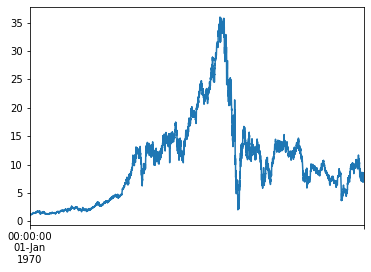

In [ ]:
close.plot()

In [ ]:
ema_50 = close.ewm(span=50,adjust=False).mean()
ema_50

1970-01-01 00:00:00.000000000    1.336654
1970-01-01 00:00:00.000000001    1.337296
1970-01-01 00:00:00.000000002    1.336950
1970-01-01 00:00:00.000000003    1.335440
1970-01-01 00:00:00.000000004    1.334418
                                   ...   
1970-01-01 00:00:00.000009067    7.873100
1970-01-01 00:00:00.000009068    7.869842
1970-01-01 00:00:00.000009069    7.859652
1970-01-01 00:00:00.000009070    7.854175
1970-01-01 00:00:00.000009071    7.853227
Name: Adj Close, Length: 9072, dtype: float64

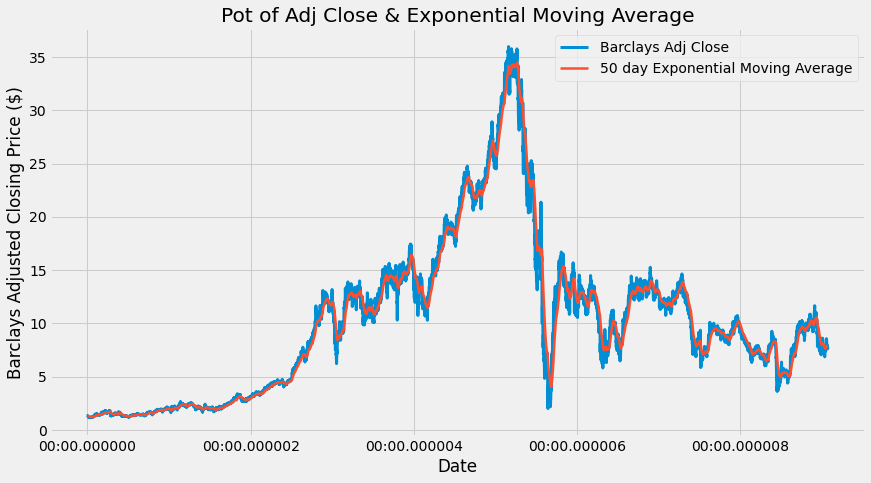

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (13,7))
plt.plot(close,label='Barclays Adj Close',linewidth=3)
plt.plot(ema_50,label='50 day Exponential Moving Average',linewidth=2.5)
plt.xlabel('Date')
plt.ylabel('Barclays Adjusted Closing Price ($)')
plt.title('Pot of Adj Close & Exponential Moving Average')
plt.legend()

# Implementing Autoregressive Integrated Moving Average (ARIMA)

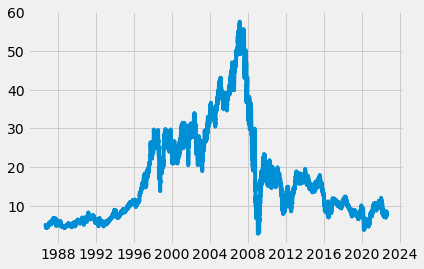

In [ ]:
import datetime as dt

x = [dt.datetime.strptime(d,"%Y-%m-%d").date() for d in data["Date"]]
y = data["Close"]

plt.plot(x,y)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  warnings.warn('No frequency information was'


                             ARIMA Model Results                              
Dep. Variable:            D.Adj Close   No. Observations:                 9071
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1608.584
Method:                       css-mle   S.D. of innovations              0.289
Date:                Wed, 07 Sep 2022   AIC                           3231.168
Time:                        17:16:54   BIC                           3280.958
Sample:                    01-01-1970   HQIC                          3248.103
                         - 01-01-1970                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0007      0.003      0.264      0.792      -0.005       0.006
ar.L1.D.Adj Close    -0.0343      0.010     -3.265      0.001      -0.055      -0.014
ar.L2.D.Adj Close    -0.

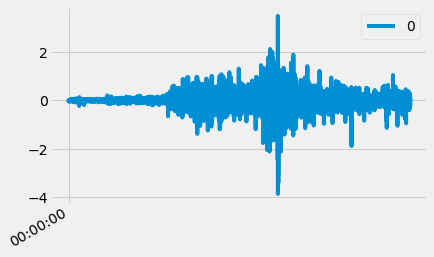

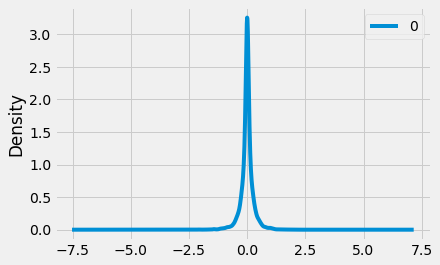

                  0
count  9.071000e+03
mean  -1.765461e-07
std    2.889356e-01
min   -3.854312e+00
25%   -8.451718e-02
50%    1.061952e-04
75%    8.780918e-02
max    3.485009e+00


In [ ]:
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
from pandas import DataFrame
 
def parser(x):
    return dt.datetime.strptime(x, "%Y-%m-%d")

arimaM = ARIMA(close, order=(5,1,0))
arimaMfit = arimaM.fit(disp=0)
print(arimaMfit.summary())

errors = DataFrame(arimaMfit.resid)
errors.plot()
pyplot.show()
errors.plot(kind='kde')
pyplot.show()
print(errors.describe())

pred=10.979391, exp=10.790887
pred=10.824943, exp=10.830802
pred=10.857109, exp=10.697747
pred=10.737875, exp=11.382987
pred=11.358077, exp=11.369679
pred=11.344677, exp=11.622489
pred=11.603199, exp=12.267812
pred=12.201778, exp=12.074882
pred=12.060551, exp=12.287770
pred=12.262642, exp=12.340991
pred=12.312206, exp=12.261159
pred=12.273757, exp=11.975088
pred=11.981369, exp=11.948475
pred=11.964606, exp=11.456167
pred=11.491460, exp=11.402945
pred=11.438517, exp=11.389639
pred=11.404068, exp=10.591301
pred=10.650440, exp=10.571342
pred=10.603499, exp=10.558036
pred=10.578824, exp=10.737663
pred=10.765233, exp=10.903979
pred=10.885152, exp=11.961782
pred=11.906921, exp=12.274467
pred=12.210401, exp=12.241199
pred=12.203557, exp=12.101492
pred=12.061269, exp=12.666982
pred=12.646358, exp=12.733511
pred=12.717646, exp=12.533927
pred=12.535090, exp=11.509392
pred=11.538118, exp=11.615837
pred=11.659899, exp=11.795462
pred=11.817493, exp=11.562613
pred=11.604537, exp=12.420829
pred=12.37

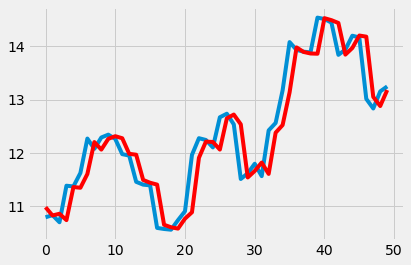

In [ ]:
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
 
def parser(x):
    return dt.datetime.strptime(x, "%Y-%m-%d")
 
#df = pd.read_csv(data, header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
X = close.values
size = int(len(X) * 0.66)
limitCount = 50
train, test = X[0:size], X[size:size+limitCount]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('pred=%f, exp=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Mean Squared Error: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

# Implementing Capital Assets Pricing Model (CAPM)

<AxesSubplot:>

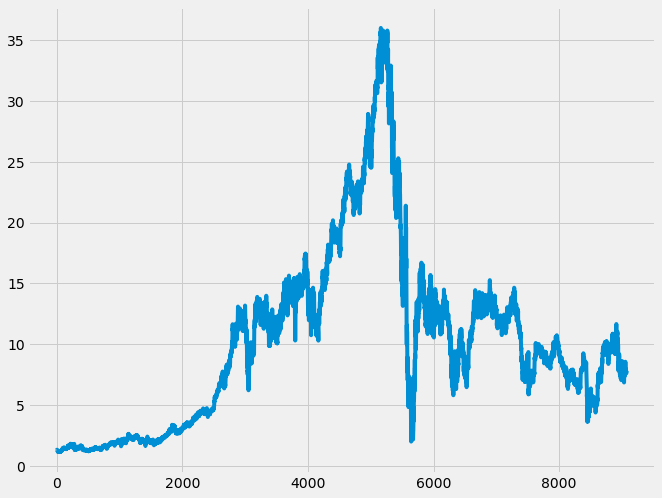

In [ ]:
data['Adj Close'].plot(label= 'Barclays', figsize= (10,8))

In [ ]:
data['Cumulative'] = data['Adj Close'] / data['Adj Close'].iloc[0]

<AxesSubplot:>

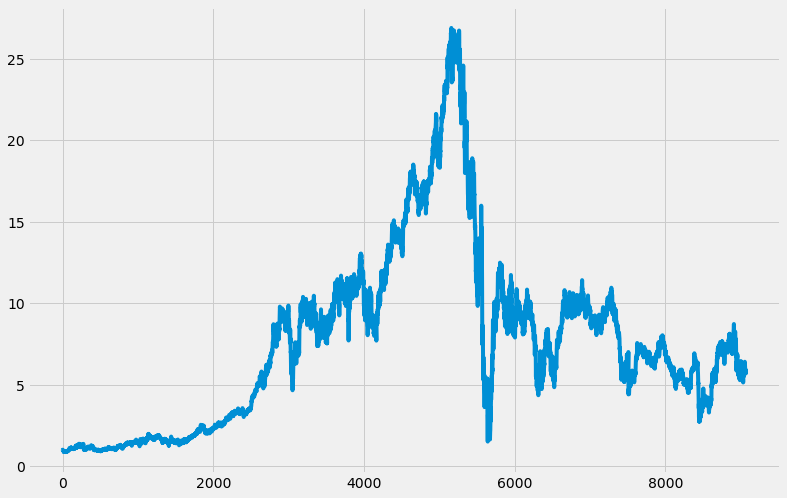

In [ ]:
data['Cumulative'].plot(label = 'Barclays', figsize= (12,8))

In [ ]:
data['Daily Return'] = data['Adj Close'].pct_change(1)

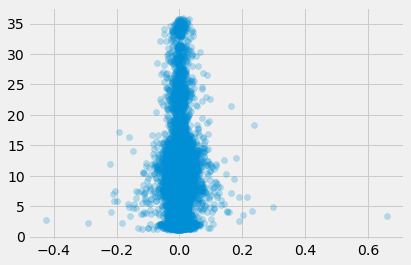

In [ ]:
plt.scatter(data['Daily Return'],data['Adj Close'], alpha= 0.25)

In [ ]:
from scipy import stats
beta, alpha, r_value, p_value, std_err= stats.linregress(data['Daily Return'].iloc[1:],
                                                        data['Adj Close'].iloc[1:])

print('Beta:', beta)
print('alpha:', alpha)
print('r_value:', r_value)
print('p_value', p_value)
print('std_err', std_err)

Beta: 1.9243501802021095
alpha: 10.1864825856144
r_value: 0.0072452046044234625
p_value 0.49021917292064143
std_err 2.788960416850563


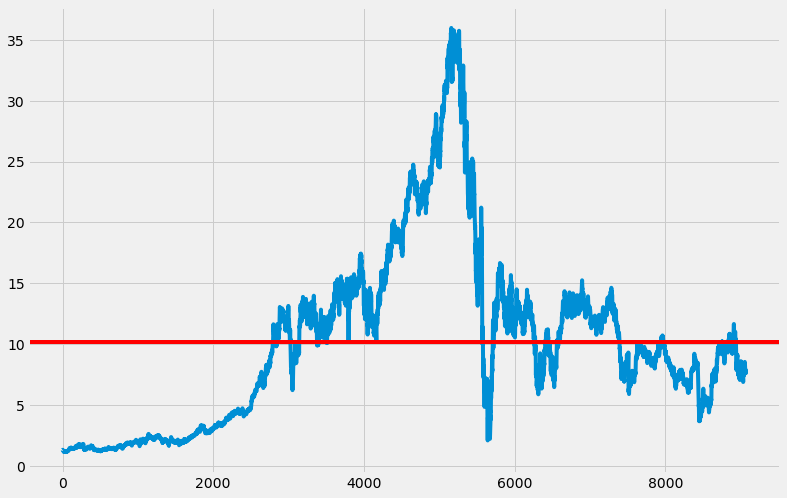

In [ ]:
spread = data['Adj Close'] - data['Daily Return']
spread.plot(label= 'Spread', figsize= (12,8))
plt.axhline(spread.mean(), c= 'r')

In [ ]:
def zscore(stocks):
    return (stocks-stocks.mean()) / np.std(stocks)

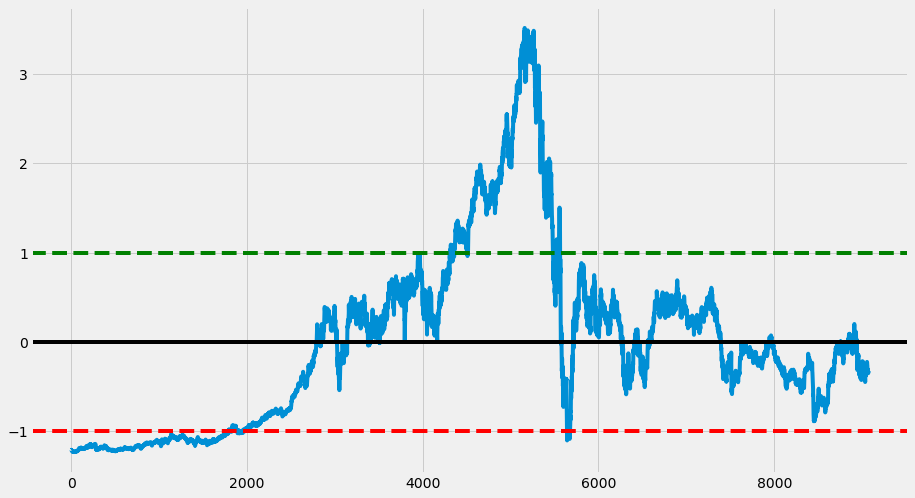

In [ ]:
zscore(spread).plot(figsize= (14,8))
plt.axhline(zscore(spread).mean(), color= 'black')
plt.axhline(1.0, c= 'g', ls= '--')
plt.axhline(-1.0, c= 'r', ls= '--')

In [ ]:
spread_navg1 = spread.rolling(1).mean()
spread_navg30 = spread.rolling(30).mean()
std_30 = spread.rolling(30).std()
zscore_30_1 = (spread_navg1-spread_navg30)/std_30

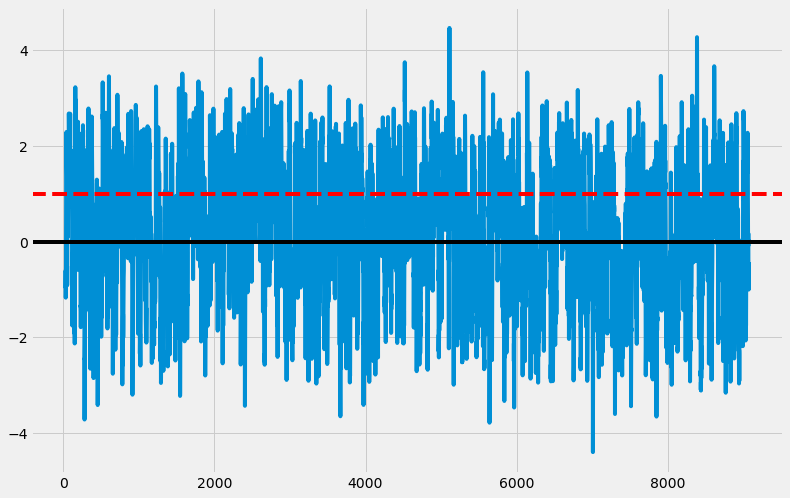

In [ ]:
zscore_30_1.plot(figsize= (12,8), label= 'Rolling 30 day Z score')
plt.axhline(0, color= 'black')
plt.axhline(1.0, color='red', ls='--')

# Implementing Auto-Correlation Function (ACF) and Partial Auto-Correlation Function (PACF)

In [ ]:
from pandas.plotting import autocorrelation_plot
from pandas.plotting import lag_plot
from statsmodels.tsa.stattools import adfuller, acf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

<Figure size 432x288 with 0 Axes>

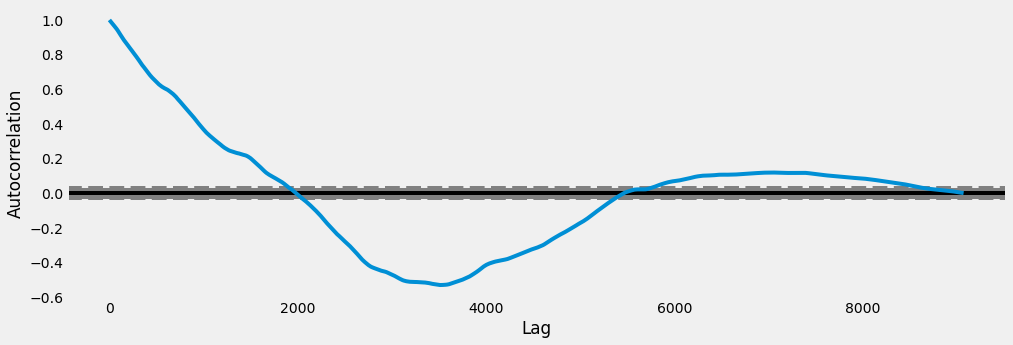

In [ ]:
plt.clf()
fig, ax = plt.subplots(figsize=(15, 5))
autocorrelation_plot(data['Close'], ax=ax)

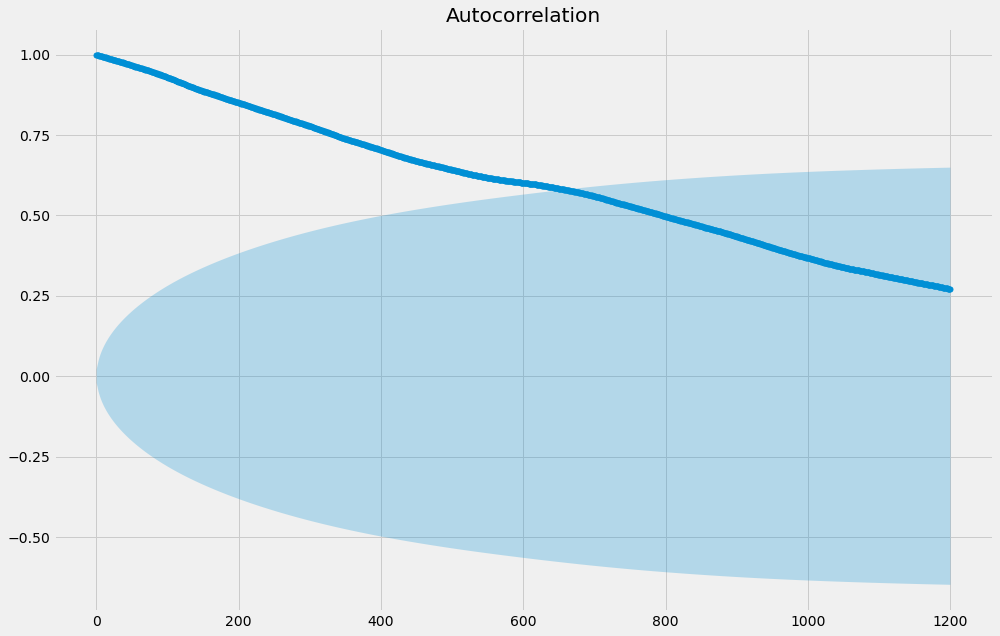

<Figure size 432x288 with 0 Axes>

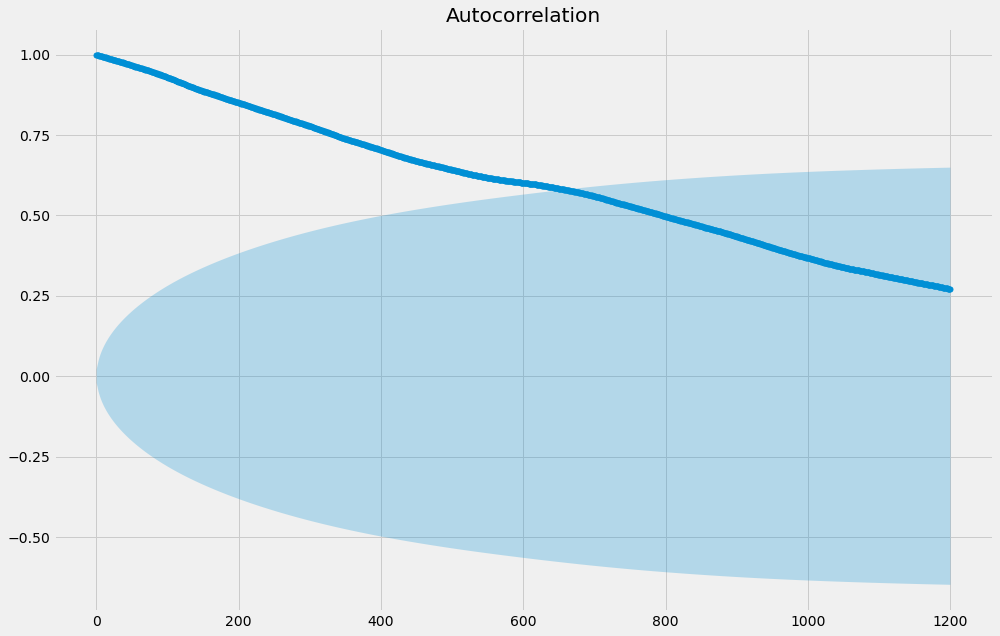

In [ ]:
plt.clf()
fig, ax = plt.subplots(figsize=(15, 10))
plot_acf(data['Close'], lags=1200, use_vlines=False, ax=ax)

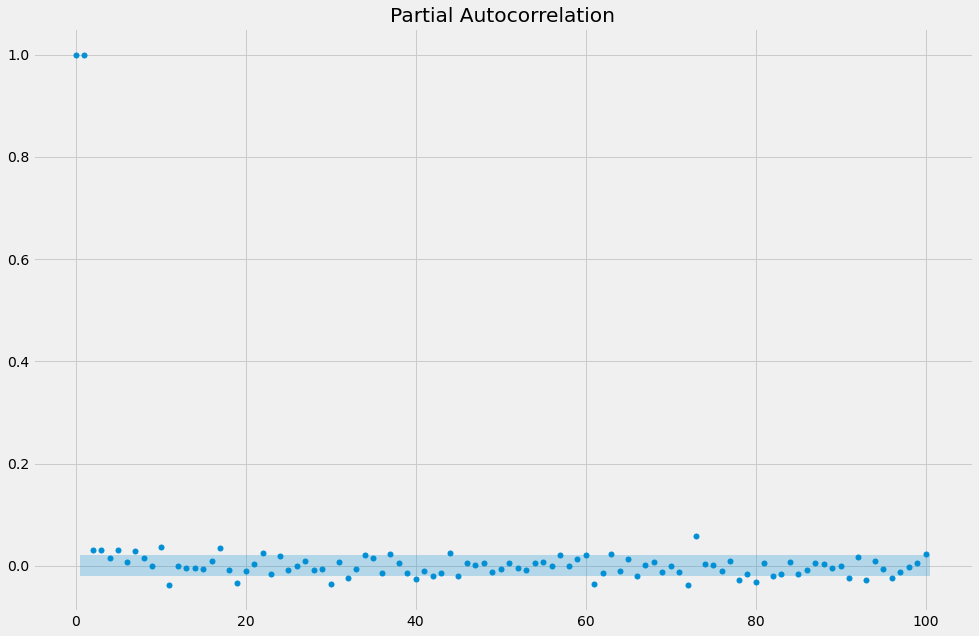

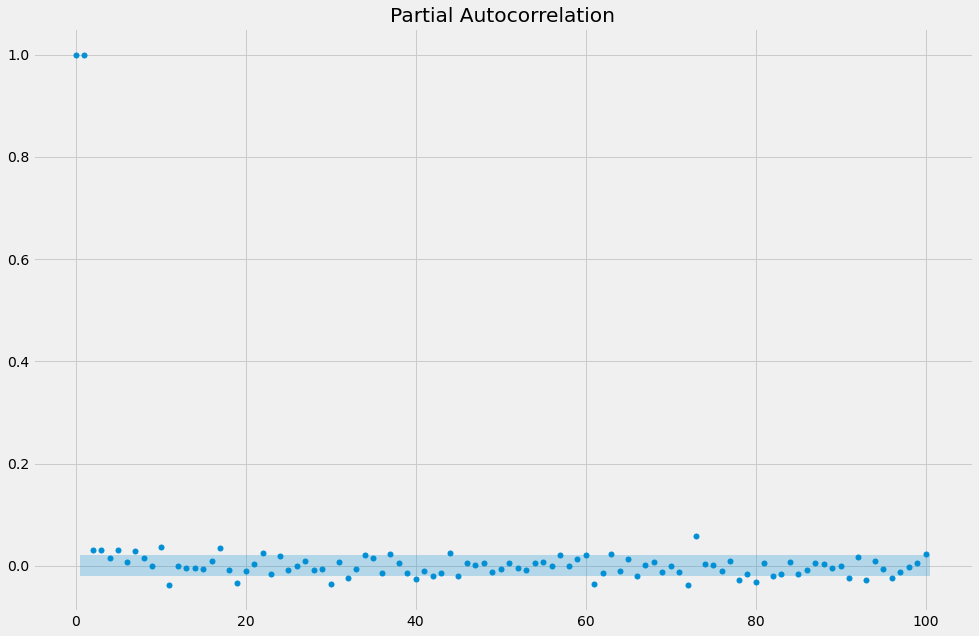

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
plot_pacf(data['Close'], lags=100, use_vlines=False, ax=ax)

In [ ]:
def calculate_acf(series, nlags=100):
    alpha = 0.05
    acf_value, confint, qstat, pvalues, *_ = acf(series,
                                             unbiased=True,
                                             nlags=nlags,
                                             qstat=True,
                                             alpha=alpha)
    for l, p_val in enumerate(pvalues):
        if p_val > alpha:
            print("Null hypothesis is accepted at lag = {} for p-val = {}".format(l, p_val))
        else:
            print("Null hypothesis is rejected at lag = {} for p-val = {}".format(l, p_val))

In [ ]:
calculate_acf(data['Close'])

Null hypothesis is rejected at lag = 0 for p-val = 0.0
Null hypothesis is rejected at lag = 1 for p-val = 0.0
Null hypothesis is rejected at lag = 2 for p-val = 0.0
Null hypothesis is rejected at lag = 3 for p-val = 0.0
Null hypothesis is rejected at lag = 4 for p-val = 0.0
Null hypothesis is rejected at lag = 5 for p-val = 0.0
Null hypothesis is rejected at lag = 6 for p-val = 0.0
Null hypothesis is rejected at lag = 7 for p-val = 0.0
Null hypothesis is rejected at lag = 8 for p-val = 0.0
Null hypothesis is rejected at lag = 9 for p-val = 0.0
Null hypothesis is rejected at lag = 10 for p-val = 0.0
Null hypothesis is rejected at lag = 11 for p-val = 0.0
Null hypothesis is rejected at lag = 12 for p-val = 0.0
Null hypothesis is rejected at lag = 13 for p-val = 0.0
Null hypothesis is rejected at lag = 14 for p-val = 0.0
Null hypothesis is rejected at lag = 15 for p-val = 0.0
Null hypothesis is rejected at lag = 16 for p-val = 0.0
Null hypothesis is rejected at lag = 17 for p-val = 0.0
Nu

In [ ]:
adf, p_value, usedlag, nobs, critical_values, *values = adfuller(data['Close'])
print ("ADF is ", adf)
print ("p value is ", p_value)
print ("lags used are ", usedlag)
print ("Number of observations are ", nobs)
print ("Critical Values are", critical_values)

ADF is  -1.6575838692206437
p value is  0.45308827589054435
lags used are  36
Number of observations are  9035
Critical Values are {'1%': -3.4310739799511976, '5%': -2.8618599523090786, '10%': -2.5669403055785334}


# Implementing Time Series forecasting with Prophet

In [ ]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
data['Date']=pd.to_datetime(data['Date'],infer_datetime_format=True,format='%Y-%m-%d')

In [ ]:
dat  = data[["Date", "Volume"]]

In [ ]:
dat.rename(columns={'Date':'ds','Volume':'y'},inplace=True)

In [ ]:
model = Prophet()
model.fit(dat)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxfx04v3f/e6ake8ql.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxfx04v3f/0m928kfb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=536', 'data', 'file=/tmp/tmpxfx04v3f/e6ake8ql.json', 'init=/tmp/tmpxfx04v3f/0m928kfb.json', 'output', 'file=/tmp/tmp7du_xx6u/prophet_model-20220907130836.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:08:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:08:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = model.make_future_dataframe(periods=0, freq='M')
future.tail()

ds
9067 2022-08-30
9068 2022-08-31
9069 2022-09-01
9070 2022-09-02
9071 2022-09-06

In [ ]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds          yhat    yhat_lower    yhat_upper
9067 2022-08-30  5.129466e+06  1.314999e+06  8.855202e+06
9068 2022-08-31  5.054941e+06  1.518379e+06  8.724222e+06
9069 2022-09-01  5.174049e+06  1.556582e+06  8.889814e+06
9070 2022-09-02  5.218028e+06  1.435156e+06  8.751699e+06
9071 2022-09-06  5.313173e+06  1.462171e+06  9.049627e+06

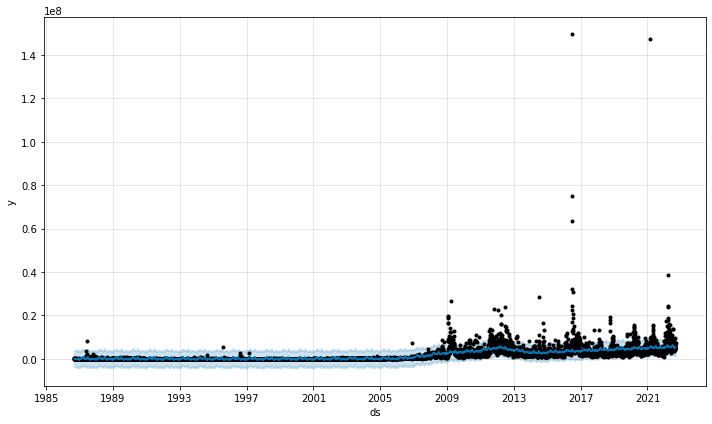

In [ ]:
fig1 = model.plot(forecast)

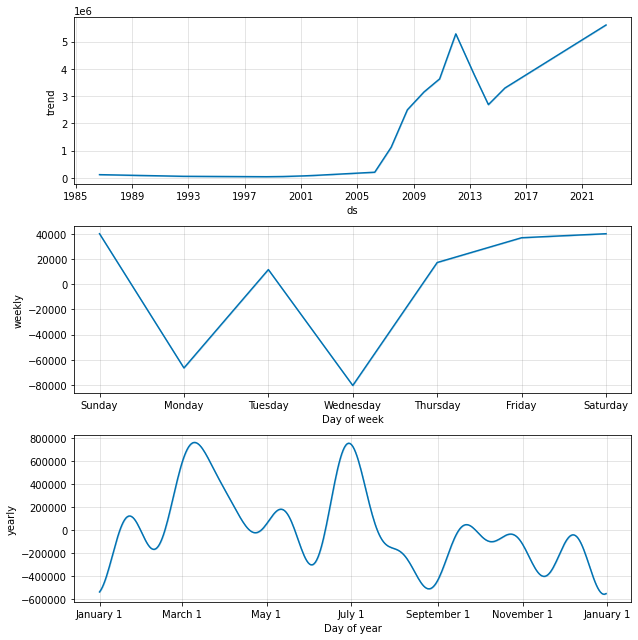

In [ ]:
fig2 = model.plot_components(forecast)

In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, forecast)

In [ ]:
plot_components_plotly(model, forecast)